In [1]:
### Import Necessary Packages ###

import ROOT 
import numpy as np
from root_numpy import root2array, tree2array, rec2array
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Welcome to JupyROOT 6.10/04


In [2]:
### Choose User Inputs ###

categoryLabels = [  'is_passed_ttHhad' ,
                    'is_passed_ttHhad_4jet1bjet' ,
                    'is_passed_ttHhad_4jet2bjet' ,
                    'is_passed_ttHhad_5jet1bjet' ,
                    'is_passed_ttHhad_5jet2bjet' ,
                    'is_passed_ttHhad_6jet1bjet' ,
                    'is_passed_ttHhad_6jet2bjet' ,
                    'is_passed_tHlep_0fwd' ,
                    'is_passed_tHlep_1fwd' ,
                    'is_passed_ttHlep' ,
                    'is_passed_ttHhad_bdt1' ,
                    'is_passed_ttHhad_bdt2' ,
                    'is_passed_ttHhad_bdt3' ,
                    'is_passed_ttHhad_bdt4' ,
                    'is_passed_tHhad_bdt' ,
                    'is_passed_ttHlep_bdt1' ,
                    'is_passed_ttHlep_bdt2' ,
                    'is_passed_tHlep_bdt1' ,
                    'is_passed_tHlep_bdt2' ,
                    'is_passed_ttHhad_bdt_presel' ,
                    'is_passed_ttHlep_bdt_presel' ]

# CATEGORIES: 
# 'is_passed_ttHhad' = 0
# 'is_passed_ttHhad_4jet1bjet' = 1
# 'is_passed_ttHhad_4jet2bjet' = 2 
# 'is_passed_ttHhad_5jet1bjet' = 3
# 'is_passed_ttHhad_5jet2bjet' = 4
# 'is_passed_ttHhad_6jet1bjet' = 5
# 'is_passed_ttHhad_6jet2bjet' = 6
# 'is_passed_tHlep_0fwd' = 7
# 'is_passed_tHlep_1fwd' = 8
# 'is_passed_ttHlep' = 9
# 'is_passed_ttHhad_bdt1' = 10 
# 'is_passed_ttHhad_bdt2' = 11
# 'is_passed_ttHhad_bdt3' = 12
# 'is_passed_ttHhad_bdt4' = 13
# 'is_passed_tHhad_bdt' = 14
# 'is_passed_ttHlep_bdt1' = 15
# 'is_passed_ttHlep_bdt2' = 16
# 'is_passed_tHlep_bdt1' = 17
# 'is_passed_tHlep_bdt2' = 18
# 'is_passed_ttHhad_bdt_presel' = 19 
# 'is_passed_ttHlep_bdt_presel' = 20 

# weight_total = 21 
# bdt_category_weight = 22 

varItr = 23 

# User-Defined Variables 
whichCat = 19
nClusters = 6
nNeighbors = 4 

In [3]:
### Import the Data File and MC Files ###

inputDir = 'inputTrees/'

in_MC_FileNames = [ "Sherpa_2DP20_myy_100_160" , # Sherpa yy MC 
                    "Sherpa3jets" , # Sherpa y+jet MC 
                    "MGPy8_ttgamgam_allhad" ,
                    "MGPy8_ttgamgam_noallhad" ,
                    "MGPy8_ttgamma_allhad" ,
                    #"MGPy8_ttgamma_noallhad" ,
                    "MGPy8_ttgamma_noallhad_big" ,
                    "PowhegPy8_NNLOPS_ggH125" ] # ggH 
#                     "PowhegPy8_NNPDF30_VBFH125" , # VBF 
#                     "PowhegPy8_ZH125J" , # ZH (VH) 
#                     "PowhegPy8_WmH125J" , # W-H (VH) 
#                     "PowhegPy8_WpH125J" , # W+H (VH) 
#                     "aMCnloPy8_bbH125_yb2" , # bbH 
#                     "aMCnloPy8_bbH125_ybyt" ] # bbH 
#                     "MGPy8_tHjb125_yt_plus1" , # tH 
#                     "aMCnloHwpp_tWH125_yt_plus1" , # tH 
#                     "aMCnloPy8_ttH125" ] # ttH 

in_Data_FileName = 'data2016'

in_MC_Files = []
for fileName in in_MC_FileNames: in_MC_Files.append( ROOT.TFile.Open( inputDir+fileName+'.root' ) )

in_Data_File = ROOT.TFile.Open( inputDir+in_Data_FileName+'.root' )


### Get the Trees ###

inTreeName = 'ttHyyTree'

in_MC_Trees = []
for file in in_MC_Files: in_MC_Trees.append( file.Get( inTreeName ) )

in_Data_Tree = in_Data_File.Get( inTreeName )


Warning in <TClass::Init>: no dictionary for class xAOD::EventFormat_v1 is available


In [4]:
### Convert Data to Numpy NDArray ###

branches2read = [ 'is_passed_ttHhad' ,  
                  'is_passed_ttHhad_4jet1bjet' , 'is_passed_ttHhad_4jet2bjet' , 
                  'is_passed_ttHhad_5jet1bjet' , 'is_passed_ttHhad_5jet2bjet' ,
                  'is_passed_ttHhad_6jet1bjet' , 'is_passed_ttHhad_6jet2bjet' ,
                  'is_passed_tHlep_0fwd' , 'is_passed_tHlep_1fwd' , 'is_passed_ttHlep' , 
                  'is_passed_ttHhad_bdt1' , 'is_passed_ttHhad_bdt2' , 
                  'is_passed_ttHhad_bdt3' , 'is_passed_ttHhad_bdt4' , 'is_passed_tHhad_bdt' , 
                  'is_passed_ttHlep_bdt1' , 'is_passed_ttHlep_bdt2' , 
                  'is_passed_tHlep_bdt1' , 'is_passed_tHlep_bdt2' , 
                  'is_passed_ttHhad_bdt_presel' , 'is_passed_ttHlep_bdt_presel' ,
                  'weight_total' , 'bdt_category_weight' ,
                  'm_yy' , 'cosTS_yy' , 'DR_y_y' , 'DRmin_y_j' , 'Deta_j_j' , 'm_alljet_30' , 'met' , #'m_top_mass' ,
                  'n_jets25_central' , 'n_bjets30_77' , 'n_jets25_fwd' ,
                  #'n_el' , 'n_mu' , 'm_ll' , 'DR_ll' , 'pt_ll' , #'pTlepMET' ,   # These are for leptonic cats
                  'y1_pt' , 'y2_pt' , 
                  'y1_pz' , 'y2_pz' , 
                  'y1_eta' , 'y2_eta' ]


   # 0-20 are "is_passed_XXX," 21 and 22 are weights, and 23+ are other variables 

selection2apply = '('+categoryLabels[whichCat]+'==1&&(m_yy<120||m_yy>130))'   #'y1_is_isolated&&y2_is_isolated&&(m_yy<120||m_yy>130)' 

### Data ###

data_StrucArray = tree2array( in_Data_Tree ,
                        branches = branches2read,
                        selection = selection2apply )
                        #start=0, stop=500000, step=1)

data_Array = rec2array( data_StrucArray )
data_Array = data_Array[:,varItr:]

### Monte Carlo ### 

mc_StrucArrays = []
mc_ArraysHolder = []  # Some MC arrays won't have enough events passing selection
for tree in in_MC_Trees: 
    mc_StrucArrays.append( tree2array( tree ,
                            branches = branches2read,
                            selection = selection2apply ) )
    mc_ArraysHolder.append( rec2array( mc_StrucArrays[-1] ) )


In [5]:
### Normalize the Columns in the Arrays and Store the (Unscaled) Weights ### 

mc_Arrays = []   # Same as mc_ArraysHolder, but doesn't include the categories with not enough events 
scaled_mcArrays = []
weights_mcArrays = [] 
labels = []

for i,array in enumerate(mc_ArraysHolder): 
    if( len( array[array[:,whichCat]==1] ) > 5 ): 
        scaled_mcArrays.append( normalize( array[:,varItr:] ) )
        
        weights_mcArrays.append( np.multiply( np.multiply( array[:,21] , 
                                                           array[:,22]) , 
                                             36.1 ) )
        labels.append( in_MC_FileNames[i] )
        mc_Arrays.append( array[:,varItr:] )

scaled_dataArray = normalize( data_Array )
        
labels.append( "2016 Data" )

In [6]:
### Apply PCA on Data ### 

dataPCA = PCA(n_components=2)
#dataPCA.fit( data_Array )
dataPCA.fit( scaled_dataArray )
#reduced_Data = dataPCA.transform( data_Array )
reduced_Data = dataPCA.transform( scaled_dataArray )

### Apply PCA From Data To MC ### 

reduced_mcArrays = []
for array in scaled_mcArrays: 
#for array in mc_Arrays: 
    reduced_mcArrays.append( dataPCA.transform( array ) )

# Print Info on the PCA Components 
print( "PCA Components: " )
print( "   --- Axis #1 --- " )
indeces = np.argpartition( dataPCA.components_[0], -5 )[-5:]
for i in range(5): 
    print( "   " , branches2read[varItr+indeces[i]] , " - " , dataPCA.components_[0][indeces[i]] )

print( "   --- Axis #2 --- " )
indeces = np.argpartition( dataPCA.components_[1], -5 )[-5:]
for i in range(5): 
    print( "   " , branches2read[varItr+indeces[i]] , " - " , dataPCA.components_[1][indeces[i]] )

PCA Components: 
   --- Axis #1 --- 
    y1_eta  -  0.00621550171288
    y1_pt  -  0.00854564917863
    m_yy  -  0.00903124995975
    y2_pz  -  0.280803975968
    y1_pz  -  0.959648410783
   --- Axis #2 --- 
    y2_pz  -  0.0371664300997
    met  -  0.187582673954
    y2_pt  -  0.272607789612
    y1_pt  -  0.55146760728
    m_yy  -  0.76404127866


In [7]:
### Apply Clustering ### 

clusterData = AgglomerativeClustering( n_clusters=nClusters )
#clusterData = AgglomerativeClustering( linkage='average' , n_clusters=nClusters , affinity='cosine' )
#clusterData.fit( data_Array )
clusterData.fit( scaled_dataArray )

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=6,
            pooling_func=<function mean at 0x1200e3e18>)

In [8]:
### Use Nearest Neighbors Classifier to Predict Clusters of MC Samples ### 

neighbors = KNeighborsClassifier(weights='distance',n_neighbors=nNeighbors)
#neighbors.fit( data_Array , clusterData.labels_ )
neighbors.fit( scaled_dataArray , clusterData.labels_ )

clusterMCs = [] 

for i,array in enumerate( scaled_mcArrays ): 
#for i,array in enumerate( mc_Arrays ): 
    clusterMCs.append( neighbors.predict( array ) )


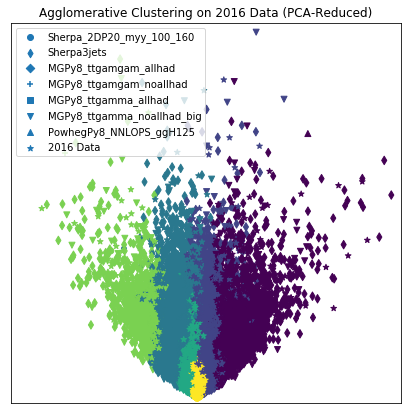

In [9]:
### Plot and the Data and MC Samples ### 

markerList = [ 'o' , 'd' , 'D' , '+' , 's' , 'v' , '^' , '<' , 'D' , 'd' , 'o' , 'o' ,'o' ]
nColors = len( reduced_mcArrays )
colorList = plt.cm.Reds(np.linspace(0, 1, nColors+1))

plt.figure(num=1,figsize=[7,7])
plt.clf()

#Get the best axes ranges 
xMax = -9999 
xMin = 9999
yMax = -9999 
yMin = 9999 

xMin = np.min( reduced_mcArrays[0][:,1] ) 

for array in reduced_mcArrays: 
    if( xMin > np.min( reduced_mcArrays[0][:,0] ) ): xMin = np.min( reduced_mcArrays[0][:,0] )
    if( xMax < np.max( reduced_mcArrays[0][:,0] ) ): xMax = np.max( reduced_mcArrays[0][:,0] )
    if( yMin > np.min( reduced_mcArrays[0][:,1] ) ): yMin = np.min( reduced_mcArrays[0][:,1] )
    if( yMax < np.max( reduced_mcArrays[0][:,1] ) ): yMax = np.max( reduced_mcArrays[0][:,1] )

if( xMin > np.min( reduced_Data[:,0] ) ): xMin = np.min( reduced_Data[:,0] )
if( xMax < np.max( reduced_Data[:,0] ) ): xMax = np.max( reduced_Data[:,0] )
if( yMin > np.min( reduced_Data[:,1] ) ): yMin = np.min( reduced_Data[:,1] )
if( yMax < np.max( reduced_Data[:,1] ) ): yMax = np.max( reduced_Data[:,1] )

xMin = 1.2*xMin
xMax = 1.2*xMax
yMin = 1.2*yMin
yMax = 1.2*yMax

# MC Samples
for i,array in enumerate(reduced_mcArrays): 
    plt.scatter(   array[:,0] , 
                   array[:,1] , 
                   c = clusterMCs[i] ,
                   marker = markerList[i] )
plt.xlim( [xMin, xMax] )
plt.ylim( [yMin, yMax] )
#     for j in range(len(array)):
#         plt.text( array[j,0] , array[j,1] , str(i) , color='k')

# All Data 
plt.scatter(  reduced_Data[:,0] , 
              reduced_Data[:,1] , 
              c=clusterData.labels_,
              marker = '*')
plt.xlim( [xMin, xMax] )
plt.ylim( [yMin, yMax] )
plt.legend(labels)

plt.title('Agglomerative Clustering on 2016 Data (PCA-Reduced)')
plt.xticks(())
plt.yticks(())
plt.show()


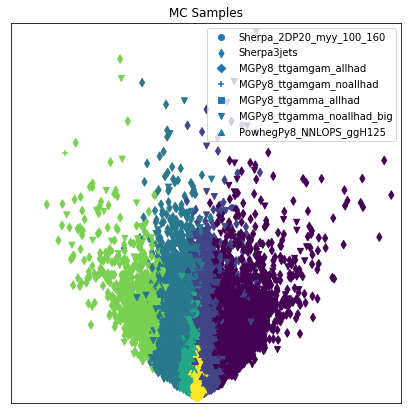

In [10]:
### Draw just the MC Samples ### 

plt.figure(num=2,figsize=[7,7])
plt.clf()

# MC Samples
for i,array in enumerate(reduced_mcArrays): 
    plt.scatter(   array[:,0] , 
                   array[:,1] , 
                   c = clusterMCs[i] ,
                   marker = markerList[i] )
plt.xlim( [xMin, xMax] )
plt.ylim( [yMin, yMax] )
plt.legend(labels)
plt.title('MC Samples')
plt.xticks(())
plt.yticks(())
plt.show()


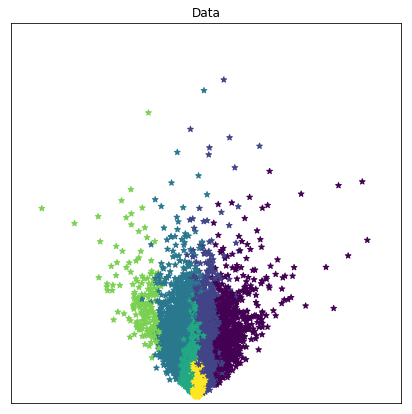

In [11]:
### Draw just the Data ### 

plt.figure(num=3,figsize=[7,7])
plt.clf()

# Data
plt.scatter(  reduced_Data[:,0] , 
              reduced_Data[:,1] , 
              c=clusterData.labels_,
              marker = '*')
plt.xlim( [xMin, xMax] )
plt.ylim( [yMin, yMax] )
plt.title('Data')
plt.xticks(())
plt.yticks(())
plt.show()


In [12]:
### Get the Composition of Categories, Including Event Weights ### 

# First, need to get total weighted yield and the individual event weights 
total_yields = []

for i,array in enumerate(weights_mcArrays): 
    total_yields.append( sum(array) )


for i,array in enumerate(clusterMCs): 
    print( "Sample: ", labels[i] )
    print( "   Yields in Category: ")
    for j in range(nClusters): 
        print( "     ", j, " - ", sum(weights_mcArrays[i][array[:]==j]) )
    print( "-------------------------------")
    
print( "DATA " )
print( "   Yields in Category: ")
for j in range(nClusters): 
    print( "     ", j, " - ", np.count_nonzero(clusterData.labels_ == j))
print( "-------------------------------")

print( "   " )
print( "   " )
print( "   " )

print( "Nubmer of Total Events: ")
print( "   Monte Carlo = " , np.sum( total_yields ))
print( "   Data = " , len(clusterData.labels_) )
    
for i,array in enumerate(clusterMCs): 
    print( "Sample: ", labels[i] )
    print( "   Fraction Events in Category: ")
    for j in range(nClusters): 
        print( "     ", j, " - ", sum(weights_mcArrays[i][array[:]==j]) / total_yields[i] )
    print( "-------------------------------")
    
print( "DATA " )
print( "   Fraction Events in Category: ")
for j in range(nClusters): 
    print( "     ", j, " - ", np.count_nonzero(clusterData.labels_ == j)/len(clusterData.labels_))
print( "-------------------------------")

Sample:  Sherpa_2DP20_myy_100_160
   Yields in Category: 
      0  -  38.5053847324
      1  -  135.953320857
      2  -  63.1767905505
      3  -  136.209516623
      4  -  2.23353760863
      5  -  293.928014393
-------------------------------
Sample:  Sherpa3jets
   Yields in Category: 
      0  -  1840.52652248
      1  -  8762.57735906
      2  -  3274.60711034
      3  -  7996.8134016
      4  -  417.126797501
      5  -  13620.2855598
-------------------------------
Sample:  MGPy8_ttgamgam_allhad
   Yields in Category: 
      0  -  0.173916985269
      1  -  1.73579985805
      2  -  0.413888169062
      3  -  3.00392436092
      4  -  0.0738734392187
      5  -  8.18514166751
-------------------------------
Sample:  MGPy8_ttgamgam_noallhad
   Yields in Category: 
      0  -  0.163538437579
      1  -  1.80260228256
      2  -  0.389153535708
      3  -  2.26117440038
      4  -  0.0432077795674
      5  -  6.02010338156
-------------------------------
Sample:  MGPy8_ttgamma_all

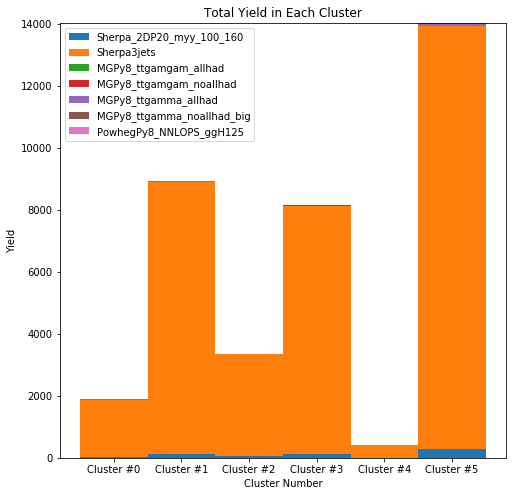

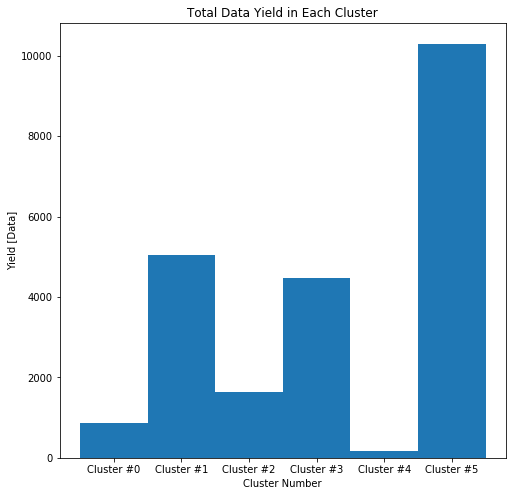

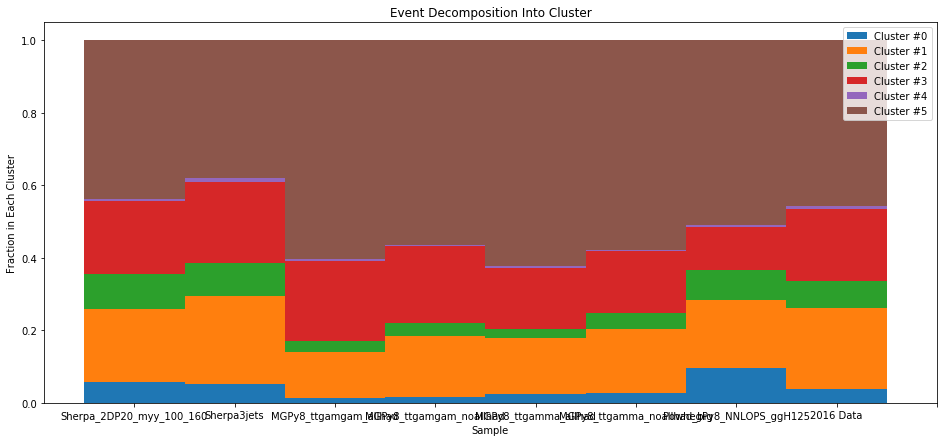

In [13]:
### Visualize the Cluster Distributions ### 

# For MC 

nSamples = len(clusterMCs)

clusterIDs = []
compositions = [] 

for i,array in enumerate( clusterMCs ): 
    sampleComposition = [] 
    for n in range(nClusters):
        sampleComposition.append( sum(weights_mcArrays[i][array[:]==n]) )
    compositions.append( sampleComposition )
    clusterIDs.append( [x for x in range(nClusters)] )

plt.figure(num=4,figsize=[8,8])
plt.hist(clusterIDs, bins=nClusters, stacked=True, weights=compositions)
x1_axis = [ (x+0.5)*(nClusters-1)/(nClusters) for x in range(nClusters)] 
x1_labels = [ 'Cluster #'+str(x) for x in range(nClusters)] 
plt.title('Total Yield in Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Yield')
plt.xticks(x1_axis, x1_labels)
plt.legend(labels)
plt.show()

# For Data 

data_clusterIDs = []
dataComposition = [] 
for n in range(nClusters):
    dataComposition.append( np.count_nonzero(clusterData.labels_ == n) )
data_clusterIDs.append( [x for x in range(nClusters)] )

plt.figure(num=4,figsize=[8,8])
plt.hist(data_clusterIDs, bins=nClusters, weights=dataComposition)
x1_axis = [ (x+0.5)*(nClusters-1)/(nClusters) for x in range(nClusters)] 
x1_labels = [ 'Cluster #'+str(x) for x in range(nClusters)] 
plt.title('Total Data Yield in Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Yield [Data]')
plt.xticks(x1_axis, x1_labels)
plt.show()


### Visualize the Cluster Compositions ### 

mcIDs = []
clusterFrac = [] 

for n in range(nClusters): 
    sampleFrac = [] 
    for i,array in enumerate( clusterMCs ): 
        sampleFrac.append( sum(weights_mcArrays[i][array[:]==n]) / total_yields[i] )
    sampleFrac.append( np.count_nonzero(clusterData.labels_ == n)/len(clusterData.labels_) )
    clusterFrac.append( sampleFrac )
    mcIDs.append( [x for x in range(len(clusterMCs)+1)] )

#Add Data 
# sampleFrac = []
# for j in range(nClusters): 
#     sampleFrac.append( np.count_nonzero(clusterData.labels_ == j)/len(clusterData.labels_) )
# clusterFrac.append( sampleFrac )
# mcIDs.append( [x for x in range(len(clusterMCs)+1)] )


plt.figure(num=5,figsize=[16,7])
plt.hist(mcIDs, bins=nSamples+1, stacked=True, weights=clusterFrac)
x2_axis = [ (x+0.5)*(nSamples)/(nSamples+1) for x in range(nSamples+2)] 
x2_labels = labels 
plt.title('Event Decomposition Into Cluster')
plt.ylabel('Fraction in Each Cluster')
plt.xlabel('Sample')
plt.xticks(x2_axis, x2_labels)
plt.legend(x1_labels)
plt.show()


In [14]:
### Perform a Basic Fit to Estimate the Composition ### 

#dataFracs = c_n * mcFracs 
# Sum( c_n ) = 1.0 
# c_n > 0 

# coefficients = [] 
solution = np.linalg.lstsq( np.asarray( clusterFrac[0:-2] ).T , np.asarray( clusterFrac[-1] ) )
print( solution[0] , solution[1] , solution[2] )

print( np.asarray( clusterFrac[0:-2] ).T.shape , np.asarray( clusterFrac[-1] ).shape )

[ 7.49839786  1.10038828 -9.31209788  2.96935812] [ 0.01953936] 4
(8, 4) (8,)


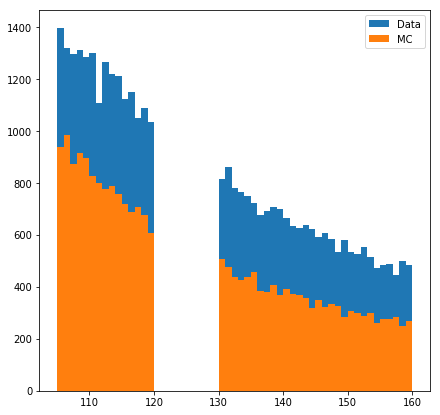

In [15]:
### Debugging: Draw the M_yy Spectra of Data and MC ### 

plt.figure(num=3,figsize=[7,7])
plt.clf()

allMCstack = np.vstack( mc_Arrays )
allMCweightsStack = np.hstack( weights_mcArrays )

plt.hist( allMCstack[:,0] , bins=55 , range=[105,160], weights=allMCweightsStack )
plt.hist( data_Array[:,0] , bins=55 , range=[105,160] )
plt.legend(["Data","MC"])
plt.show()

#print( varItr+1 ,data_Array[:100,varItr][data_Array[:100,whichCat]==1]  )